In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_pareto_qq_plot(nsamples=1000):
    """
    Create a Pareto Q-Q plot with improved parameter estimation and fit analysis.
    Focuses on the central portion of the data where the Pareto properties are
    most evident.
    """
    # Generate Pareto data with parameters that typically show better linearity
    alpha = 2.0  # Increased minimum value
    theta = 3.0  # Increased shape parameter for lighter tail
    data = alpha * np.random.pareto(theta, size=nsamples)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Improved Pareto Q-Q Plot Analysis\n'
                'Focusing on the region of best fit', 
                fontsize=14, y=1.05)
    
    # Plot 1: Distribution with careful scaling
    counts, bins, _ = ax1.hist(data, bins=50, density=True, alpha=0.6, 
                              color='blue', label='Observed Data')
    
    x_range = np.logspace(np.log10(alpha), np.log10(np.percentile(data, 99.9)), 1000)
    pareto_pdf = (theta * (alpha**theta)) / (x_range**(theta + 1))
    
    ax1.plot(x_range, pareto_pdf, 'r-', linewidth=2, 
            label=f'Theoretical PDF\nθ={theta} (shape)\nα={alpha} (scale)')
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_title('Pareto Distribution\nNote where data follows theoretical curve', pad=20)
    ax1.set_xlabel('x (log scale)')
    ax1.set_ylabel('Density (log scale)')
    ax1.legend(loc='upper right')
    ax1.grid(True, which="both", ls="-", alpha=0.2)
    
    # Plot 2: Q-Q Plot with focus on linear region
    log_data = np.log(data)
    ordered_log_data = np.sort(log_data)
    
    n = len(data)
    plotting_positions = np.arange(1, n + 1) / (n + 1)
    theoretical_quantiles = -np.log(1 - plotting_positions)
    
    # Focus on the central 80% of the data for fitting
    start_idx = int(0.1 * n)
    end_idx = int(0.9 * n)
    
    # Fit line to central portion
    slope, intercept = np.polyfit(theoretical_quantiles[start_idx:end_idx], 
                                ordered_log_data[start_idx:end_idx], 1)
    
    # Plot all points but highlight the central region
    ax2.scatter(theoretical_quantiles, ordered_log_data, 
               alpha=0.3, color='lightblue', s=20, label='All Data')
    ax2.scatter(theoretical_quantiles[start_idx:end_idx], 
               ordered_log_data[start_idx:end_idx],
               alpha=0.6, color='blue', s=20, label='Central Region (Best Fit)')
    
    # Add reference line
    line_x = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
    line_y = slope * line_x + intercept
    estimated_theta = 1/slope
    estimated_alpha = np.exp(intercept)
    ax2.plot(line_x, line_y, 'r--', linewidth=2,
            label=f'Fitted Line (Central Region)\nEstimated θ ≈ {estimated_theta:.2f}\n'
                  f'Estimated α ≈ {estimated_alpha:.2f}')
    
    ax2.set_title('Pareto Q-Q Plot\nHighlighting region of best fit', pad=20)
    ax2.set_xlabel('-log(1 - k/(n+1))\nTheoretical Quantiles')
    ax2.set_ylabel('log(x(k))\nSample Quantiles')
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig



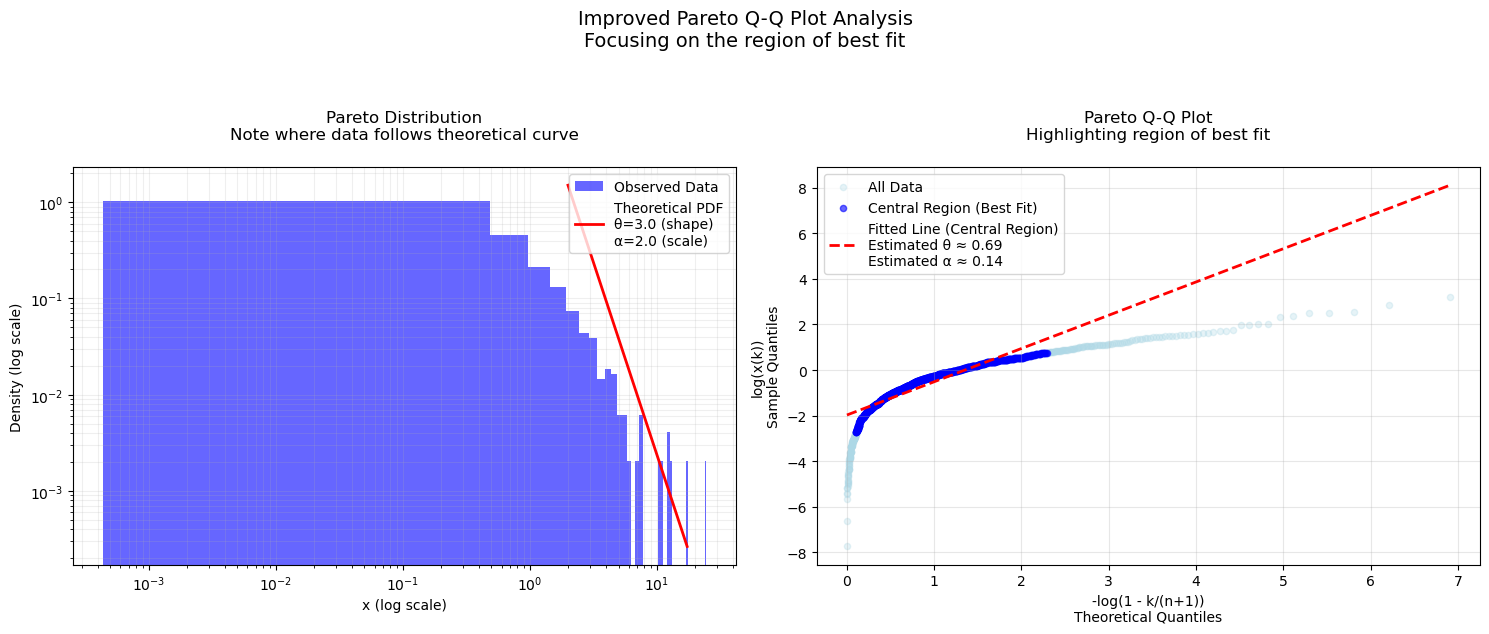

In [10]:
# Create and display the plot
fig = create_pareto_qq_plot(1000)
plt.show()